Last updated: 15 Feb 2023

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [63]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.2.0'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [4]:
import pandas as pd

# Combine features and target into one dataframe
abalone_df = pd.concat([X, y], axis=1)

# Set the column names if they are not automatically set
abalone_df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

print(abalone_df)

     sex  length  diameter  height  whole_weight  shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera_weight  shell_weight  rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [5]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(abalone_df, target = 'rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [6]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5170,4.5702,2.1347,0.5595,0.1721,0.1500,3.2150
gbr,Gradient Boosting Regressor,1.5183,4.6284,2.1489,0.5543,0.1730,0.1504,0.4220
rf,Random Forest Regressor,1.5406,4.7134,2.1688,0.5456,0.1753,0.1529,1.3380
lightgbm,Light Gradient Boosting Machine,1.5532,4.8000,2.1878,0.5382,0.1760,0.1530,0.3800
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.6100
ridge,Ridge Regression,1.5970,4.9139,2.2152,0.5275,0.1836,0.1602,0.0710
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1828,0.1603,0.0660
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1798,0.1525,0.0760
lr,Linear Regression,1.5998,5.0267,2.2391,0.5158,0.1830,0.1603,0.5860
huber,Huber Regressor,1.5654,5.0514,2.2460,0.5144,0.1810,0.1510,0.1200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

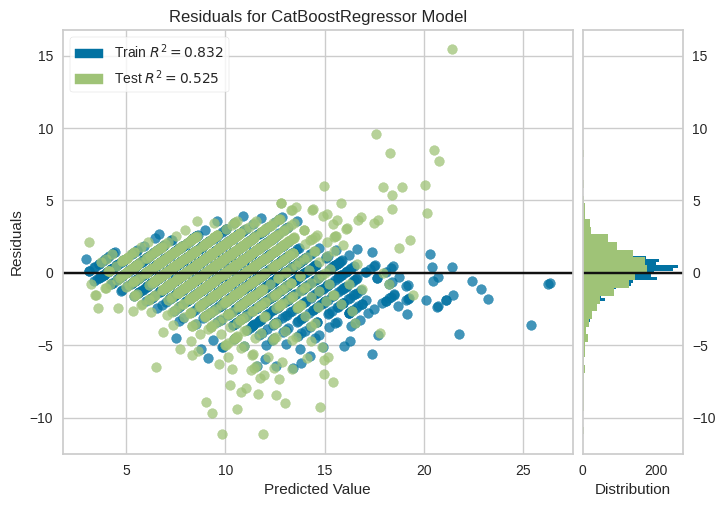

In [7]:
# plot residuals
plot_model(best, plot = 'residuals')

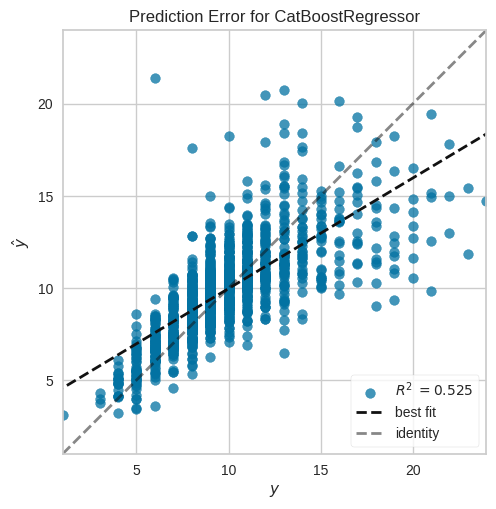

In [8]:
# plot error
plot_model(best, plot = 'error')

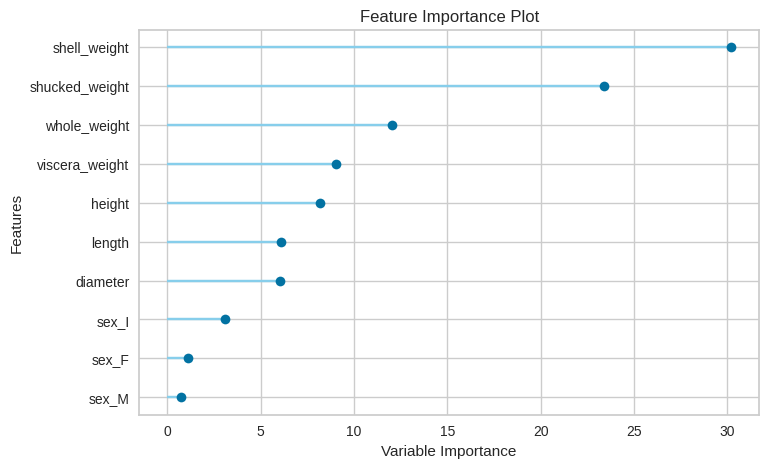

In [9]:
# plot feature importance
plot_model(best, plot = 'feature')

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [10]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.5244,4.8480,2.2018,0.5245,0.1773,0.1528


In [11]:
# show predictions df
holdout_pred.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,prediction_label
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5,5.048807
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,10,9.344533
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,9,8.765838
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,9,13.344065
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14,12.010997


In [44]:
holdout_pred['age_prediction'] = holdout_pred['prediction_label'] + 1.5
holdout_pred.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,prediction_label,age_prediction
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5,5.048807,6.548807
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,10,9.344533,10.844533
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,9,8.765838,10.265838
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,9,13.344065,14.844065
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14,12.010997,13.510997


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [12]:
# copy data and drop charges

new_abalone_df = abalone_df.copy()
new_abalone_df.drop('rings', axis=1, inplace=True)
new_abalone_df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [13]:
# predict model on new_data
predictions = predict_model(best, data = new_abalone_df)
predictions.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,prediction_label
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,9.852465
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.886630
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.678084
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9.763446
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6.453878


In [45]:
predictions['age_prediction'] = predictions['prediction_label'] + 1.5
predictions.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,prediction_label,age_prediction
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,9.852465,11.352465
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.886630,9.386630
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.678084,12.178084
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9.763446,11.263446
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6.453878,7.953878


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [14]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['length', 'diameter', 'height',
                                              'whole_weight', 'shucked_weight',
                                              'viscera_weight', 'shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['sex'],
                                     transformer=OneHotEncoder(cols=['sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  <catboost.core.CatBoostRegre

In [15]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['length', 'diameter', 'height',
                                             'whole_weight', 'shucked_weight',
                                             'viscera_weight', 'shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['sex'],
                                    transformer=OneHotEncoder(cols=['sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7a34a5c547c0>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [16]:
s = setup(abalone_df, target = 'rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [17]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [18]:
# lets access X_train_transformed
get_config('X_train_transformed')

,sex_I,sex_M,sex_F,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
112,1.0,0.0,0.0,0.435,0.320,0.080,0.3325,0.1485,0.0635,0.1050
2979,0.0,1.0,0.0,0.490,0.355,0.155,0.9810,0.4650,0.2015,0.2505
1715,0.0,1.0,0.0,0.645,0.485,0.150,1.2215,0.5695,0.2735,0.3300
3548,0.0,0.0,1.0,0.495,0.370,0.120,0.5940,0.2800,0.1100,0.1375
3911,1.0,0.0,0.0,0.355,0.270,0.100,0.2160,0.0830,0.0370,0.0750
...,...,...,...,...,...,...,...,...,...,...
1593,1.0,0.0,0.0,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
4060,1.0,0.0,0.0,0.545,0.405,0.130,0.6580,0.3270,0.1445,0.1740
1346,0.0,1.0,0.0,0.585,0.450,0.180,0.7995,0.3360,0.1855,0.2370
3454,0.0,0.0,1.0,0.575,0.460,0.165,1.0650,0.4985,0.2145,0.2815


In [19]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [20]:
# init setup with normalize = True
s = setup(abalone_df, target = 'rings', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


<AxesSubplot: >

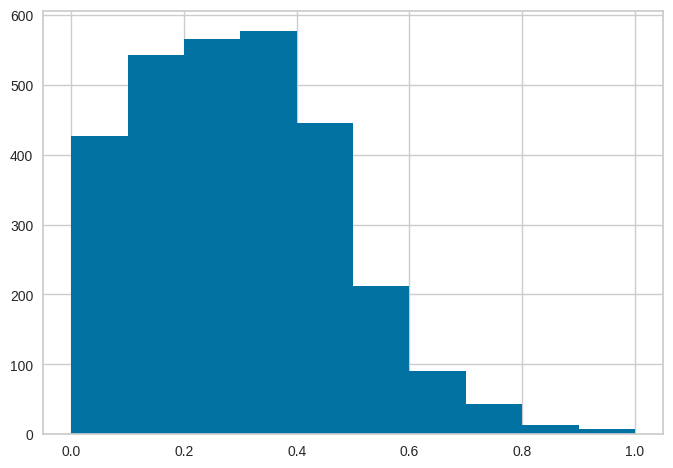

In [21]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['whole_weight'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<AxesSubplot: >

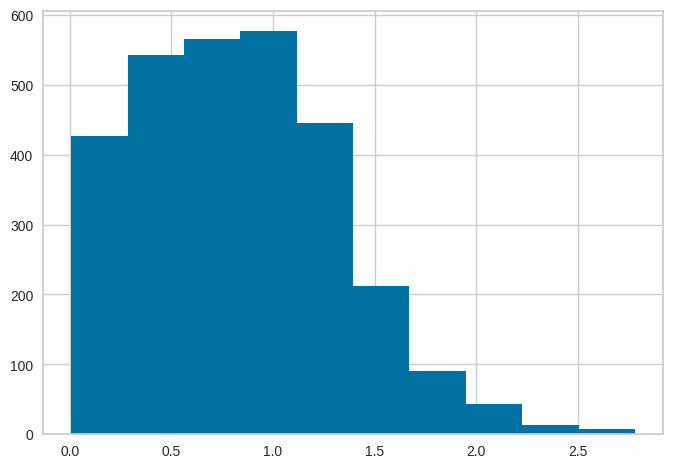

In [22]:
get_config('X_train')['whole_weight'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [23]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.4190
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,1.3260
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.6320
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.8350
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1829,0.1603,0.0790
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1828,0.1602,0.1100
huber,Huber Regressor,1.5651,5.0503,2.2457,0.5145,0.1810,0.1509,0.1560
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1829,0.1610,0.1240
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.1800
knn,K Neighbors Regressor,1.5938,5.2118,2.2821,0.4974,0.1835,0.1550,0.0790


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [24]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [26]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.4220
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,1.1970
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.4010
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.8470
huber,Huber Regressor,1.5651,5.0503,2.2457,0.5145,0.1810,0.1509,0.1240
knn,K Neighbors Regressor,1.5938,5.2118,2.2821,0.4974,0.1835,0.1550,0.0900
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1829,0.1603,0.0700
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1828,0.1602,0.0990
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.2930
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1829,0.1610,0.0680


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [27]:
# list of top 3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [28]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [29]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6099,4.9975,2.2355,0.5176,0.1880,0.1668
1,1.6427,6.2469,2.4994,0.3943,0.1930,0.1689
2,1.6473,5.5216,2.3498,0.4758,0.1826,0.1587
3,1.5899,4.7723,2.1846,0.6052,0.1748,0.1544
4,1.4977,4.4391,2.1069,0.5856,0.1692,0.1460
5,1.5223,4.5549,2.1342,0.5376,0.1784,0.1546
6,1.6191,4.5836,2.1409,0.4583,0.1828,0.1630
7,1.6911,5.3691,2.3171,0.5311,0.1875,0.1646
8,1.5552,4.9599,2.2271,0.5336,0.1847,0.1637


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [30]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6099,4.9975,2.2355,0.5176,0.1880,0.1668
1,1.6427,6.2469,2.4994,0.3943,0.1930,0.1689
2,1.6473,5.5216,2.3498,0.4758,0.1826,0.1587
3,1.5899,4.7723,2.1846,0.6052,0.1748,0.1544
4,1.4977,4.4391,2.1069,0.5856,0.1692,0.1460
5,1.5223,4.5549,2.1342,0.5376,0.1784,0.1546
6,1.6191,4.5836,2.1409,0.4583,0.1828,0.1630
7,1.6911,5.3691,2.3171,0.5311,0.1875,0.1646
8,1.5552,4.9599,2.2271,0.5336,0.1847,0.1637


In [31]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6338,5.4525,2.3351,0.4847,0.1871,0.1631
1,1.5420,4.5741,2.1387,0.5680,0.1758,0.1537
2,1.6163,4.9095,2.2157,0.5209,0.1858,0.1631
Mean,1.5974,4.9787,2.2298,0.5246,0.1829,0.1600
Std,0.0398,0.3619,0.0808,0.0341,0.0051,0.0044


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6112,4.9952,2.2350,0.5178,0.1880,0.1672
1,1.6436,6.2401,2.4980,0.3950,0.1935,0.1692
2,1.6461,5.5187,2.3492,0.4761,0.1826,0.1586
3,1.5893,4.7689,2.1838,0.6054,0.1748,0.1543
4,1.4943,4.4272,2.1041,0.5867,0.1690,0.1457
5,1.5237,4.5586,2.1351,0.5372,0.1786,0.1548
6,1.6183,4.5787,2.1398,0.4589,0.1828,0.1630
7,1.6917,5.3627,2.3157,0.5317,0.1878,0.1653
8,1.5502,4.9402,2.2227,0.5354,0.1846,0.1634


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [33]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [16]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0512,9.3072,3.0508,0.1016,0.2484,0.2103
1,1.9898,8.5290,2.9204,0.1731,0.2319,0.1945
2,2.1195,9.6826,3.1117,0.0808,0.2424,0.2005
3,2.0959,8.8493,2.9748,0.2678,0.2386,0.2013
4,1.9315,8.0959,2.8453,0.2442,0.2301,0.1909
5,1.9178,7.6233,2.7610,0.2261,0.2269,0.1940
6,2.2842,10.4486,3.2324,-0.2349,0.2484,0.2217
7,2.0651,8.9966,2.9994,0.2143,0.2306,0.1938
8,2.0925,9.5308,3.0872,0.1037,0.2406,0.2084


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1972,0.1607
1,1.6485,6.0648,2.4627,0.4120,0.1949,0.1574
2,1.6962,6.7918,2.6061,0.3552,0.1970,0.1488
3,1.7021,6.0976,2.4693,0.4955,0.1948,0.1542
4,1.5497,5.1704,2.2738,0.5173,0.1804,0.1436
5,1.3990,4.3536,2.0865,0.5580,0.1703,0.1365
6,1.5103,4.9144,2.2168,0.4192,0.1847,0.1450
7,1.6353,6.5796,2.5651,0.4254,0.1938,0.1458
8,1.5685,6.3151,2.5130,0.4061,0.1964,0.1515


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [18]:
dt

DecisionTreeRegressor(random_state=123)

In [19]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6985,6.4541,2.5405,0.3770,0.2082,0.1781
1,1.7145,5.7783,2.4038,0.4398,0.1927,0.1684
2,1.7512,6.5911,2.5673,0.3743,0.1979,0.1652
3,1.6811,5.3889,2.3214,0.5541,0.1862,0.1610
4,1.5351,4.8357,2.1990,0.5486,0.1753,0.1486
5,1.5666,5.0187,2.2402,0.4905,0.1798,0.1572
6,1.6789,5.4960,2.3444,0.3505,0.1891,0.1653
7,1.6469,5.4194,2.3280,0.5267,0.1781,0.1569
8,1.7033,6.7758,2.6030,0.3628,0.2020,0.1715


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [20]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1972,0.1607
1,1.6485,6.0648,2.4627,0.4120,0.1949,0.1574
2,1.6962,6.7918,2.6061,0.3552,0.1970,0.1488
3,1.7021,6.0976,2.4693,0.4955,0.1948,0.1542
4,1.5497,5.1704,2.2738,0.5173,0.1804,0.1436
5,1.3990,4.3536,2.0865,0.5580,0.1703,0.1365
6,1.5103,4.9144,2.2168,0.4192,0.1847,0.1450
7,1.6353,6.5796,2.5651,0.4254,0.1938,0.1458
8,1.5685,6.3151,2.5130,0.4061,0.1964,0.1515


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1.0,
                      min_impurity_decrease=0.002, min_samples_leaf=5,
                      min_samples_split=5, random_state=123)

In [22]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['length',
                                                                          'diameter',
                                                                          'height',
                                                                          'whole_weight',
                                                                          'shucked_weight',
                                                                          'viscera_weight',
                                                                          'shell_weight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [23]:
# tune dt using optuna
tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7449,5.6094,2.3684,0.4585,0.2011,0.1826
1,1.7717,6.0207,2.4537,0.4163,0.1966,0.1734
2,1.7535,6.4894,2.5474,0.3839,0.1944,0.1632
3,1.7516,5.9820,2.4458,0.5051,0.1899,0.1631
4,1.6614,5.5798,2.3622,0.4791,0.1849,0.1578
5,1.5934,5.3368,2.3102,0.4582,0.1824,0.1596
6,1.6219,4.8229,2.1961,0.4300,0.1833,0.1624
7,1.5736,5.0690,2.2514,0.5573,0.1746,0.1491
8,1.5991,5.8265,2.4138,0.4521,0.1938,0.1617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-29 18:24:40,874] Searching the best hyperparameters using 2923 samples...
[I 2023-11-29 18:24:53,457] Finished hyperparameter search!


DecisionTreeRegressor(max_depth=5, max_features=0.9906746953465799,
                      min_impurity_decrease=0.01632507347770405,
                      min_samples_leaf=3, min_samples_split=4,
                      random_state=123)

For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [51]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5710,5.2239,2.2856,0.4957,0.1940,0.1667
1,1.5853,5.2649,2.2945,0.4895,0.1866,0.1601
2,1.6447,5.7308,2.3939,0.4559,0.1854,0.1553
3,1.6247,5.1375,2.2666,0.5749,0.1791,0.1538
4,1.5137,4.3761,2.0919,0.5915,0.1715,0.1485
5,1.5664,4.4711,2.1145,0.5461,0.1764,0.1593
6,1.6041,4.6948,2.1667,0.4452,0.1805,0.1595
7,1.6524,5.2864,2.2992,0.5383,0.1783,0.1589
8,1.6027,5.5047,2.3462,0.4823,0.1873,0.1633


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [52]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6519,5.9317,2.4355,0.4274,0.2034,0.1685
1,1.6485,5.5870,2.3637,0.4583,0.1903,0.1625
2,1.7167,6.3857,2.5270,0.3938,0.1951,0.1585
3,1.6781,6.0000,2.4495,0.5036,0.1932,0.1560
4,1.4966,4.5377,2.1302,0.5764,0.1740,0.1460
5,1.5205,5.0616,2.2498,0.4861,0.1856,0.1507
6,1.6301,5.1644,2.2725,0.3897,0.1920,0.1583
7,1.5959,5.7123,2.3900,0.5011,0.1876,0.1506
8,1.6438,6.5822,2.5656,0.3810,0.1992,0.1589


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [53]:
# top 3 models based on mae
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123)]

In [54]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5048,4.5734,2.1386,0.5585,0.1812,0.1586
1,1.5552,4.8390,2.1998,0.5308,0.1775,0.1561
2,1.5616,5.1137,2.2613,0.5145,0.1749,0.1472
3,1.5396,4.5049,2.1225,0.6273,0.1676,0.1456
4,1.4075,3.9485,1.9871,0.6314,0.1598,0.1372
5,1.3997,3.7441,1.9350,0.6199,0.1604,0.1431
6,1.5497,4.3939,2.0962,0.4807,0.1754,0.1536
7,1.5571,4.8372,2.1994,0.5776,0.1713,0.1502
8,1.4883,5.0845,2.2549,0.5219,0.1783,0.1512


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [55]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5032,4.4869,2.1182,0.5669,0.1780,0.1568
1,1.5437,4.7249,2.1737,0.5419,0.1812,0.1566
2,1.5197,4.9807,2.2317,0.5272,0.1725,0.1442
3,1.5045,4.2981,2.0732,0.6444,0.1646,0.1438
4,1.4037,3.9324,1.9830,0.6329,0.1588,0.1362
5,1.4266,3.8116,1.9523,0.6130,0.1620,0.1446
6,1.5403,4.2809,2.0690,0.4941,0.1745,0.1533
7,1.5743,4.8288,2.1975,0.5783,0.1736,0.1527
8,1.4463,4.6722,2.1615,0.5606,0.1742,0.1493


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

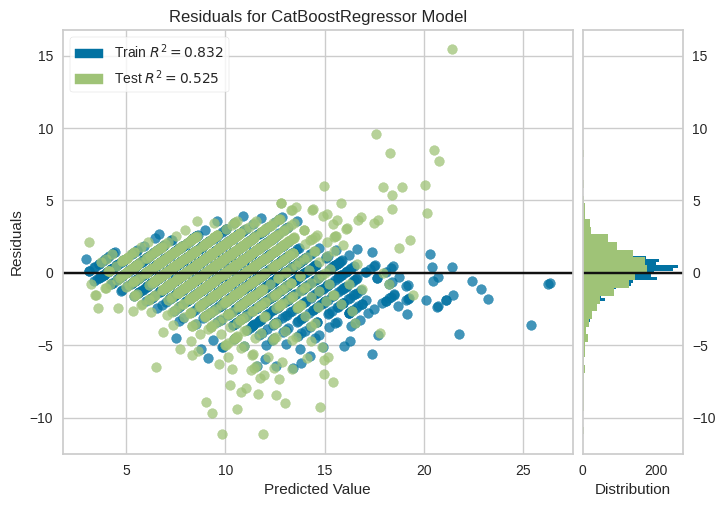

In [24]:
# plot residuals
plot_model(best, plot = 'residuals')

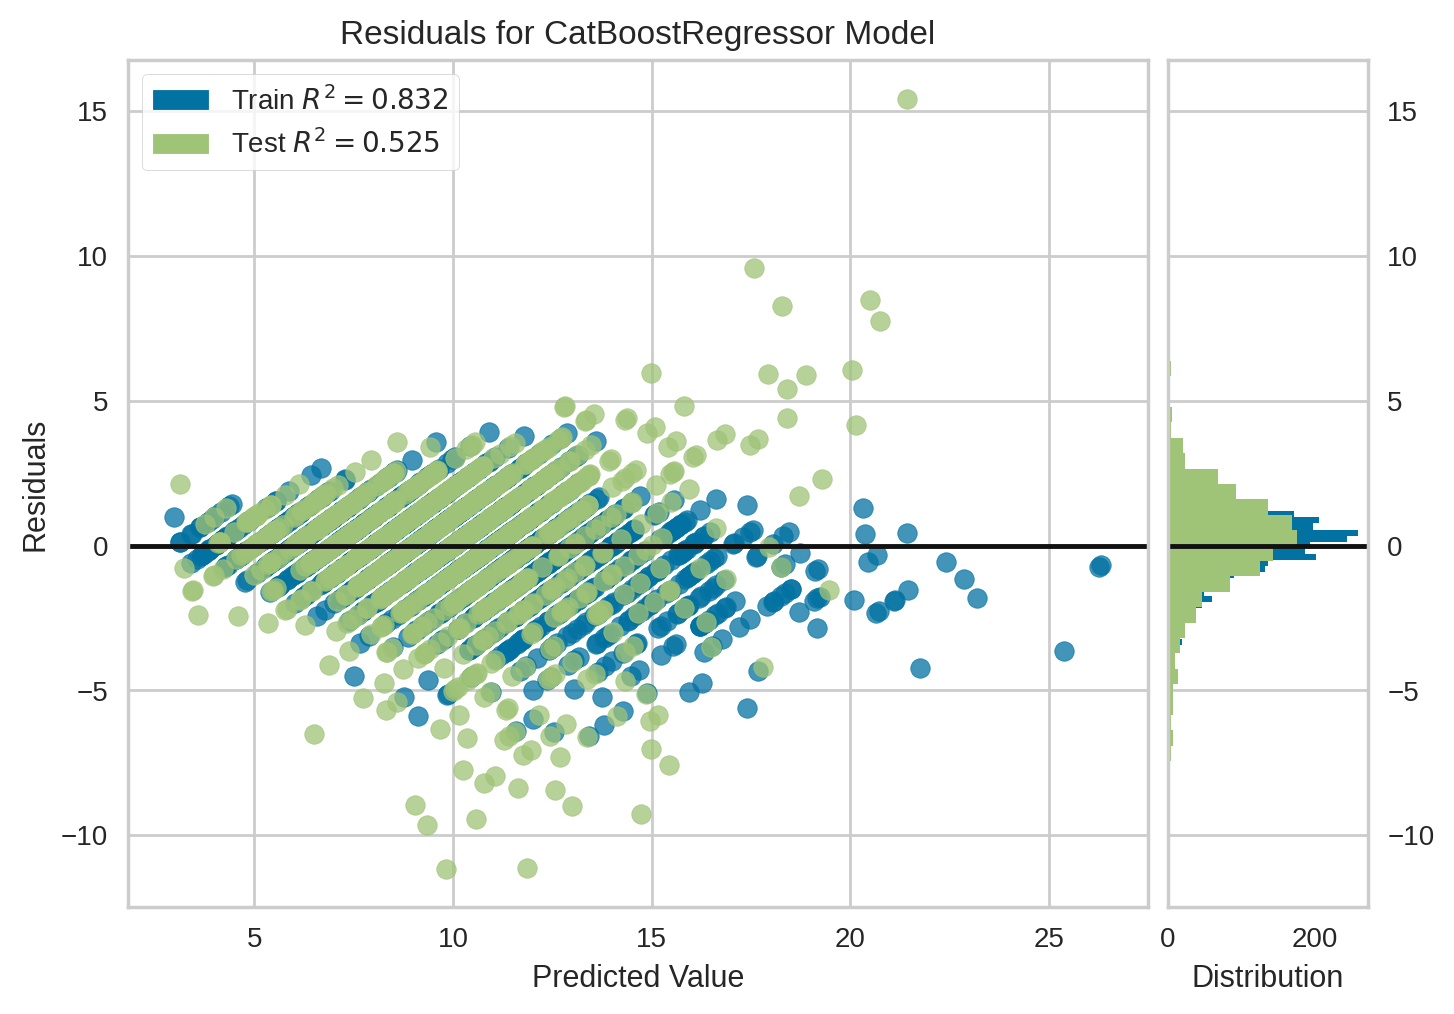

In [25]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [26]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [27]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5396,4.6625,2.1593,0.5499,0.1822,0.1606
1,1.5946,5.0339,2.2436,0.5119,0.1820,0.1596
2,1.6198,5.3838,2.3203,0.4889,0.1787,0.1511
3,1.6160,4.9674,2.2288,0.5890,0.1763,0.1527
4,1.4561,4.2201,2.0543,0.6061,0.1648,0.1416
5,1.4238,3.7199,1.9287,0.6224,0.1609,0.1454
6,1.5664,4.6173,2.1488,0.4543,0.1779,0.1541
7,1.6124,5.2272,2.2863,0.5435,0.1791,0.1566
8,1.5271,5.3216,2.3069,0.4996,0.1836,0.1547


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

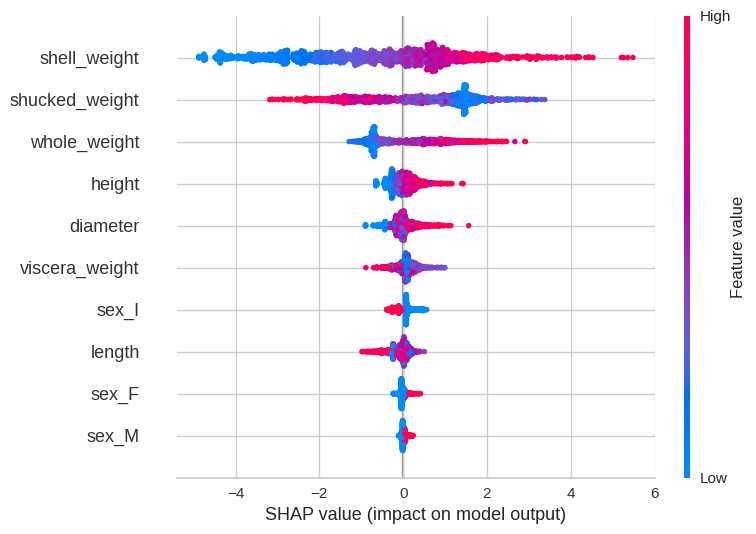

In [28]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [29]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [30]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/31 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['length', 'diamet...",1.5998,5.0267,2.2391,0.5158,0.1830,0.1603
1,Lasso Regression,"(TransformerWrapper(include=['length', 'diamet...",2.3643,10.4823,3.2344,-0.0037,0.2878,0.2658
2,Ridge Regression,"(TransformerWrapper(include=['length', 'diamet...",1.5970,4.9139,2.2152,0.5275,0.1836,0.1602
3,Elastic Net,"(TransformerWrapper(include=['length', 'diamet...",2.2578,9.6086,3.0964,0.0803,0.2738,0.2515
4,Least Angle Regression,"(TransformerWrapper(include=['length', 'diamet...",1.9383,8.0975,2.8398,0.2190,0.2398,0.1886
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['length', 'diamet...",2.3643,10.4823,3.2344,-0.0037,0.2878,0.2658
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['length', 'diamet...",2.0077,7.4849,2.7331,0.2827,0.2272,0.2051
7,Bayesian Ridge,"(TransformerWrapper(include=['length', 'diamet...",1.5983,5.0029,2.2342,0.5182,0.1828,0.1603
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['length', 'diamet...",2.3693,9.6916,3.0373,0.0826,0.2716,0.2331


In [31]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['length', 'diameter', 'height',
                                             'whole_weight', 'shucked_weight',
                                             'viscera_weight', 'shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['sex'],
                                    transformer=OneHotEncoder(cols=['sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ['trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7a33d3606440>]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [32]:
# find best model based on CV metrics
automl()

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [33]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [37]:
final_best = finalize_model(best)

In [38]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['length', 'diameter', 'height',
                                             'whole_weight', 'shucked_weight',
                                             'viscera_weight', 'shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['sex'],
                                    transformer=OneHotEncoder(cols=['sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7a33cfba0550>)])

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [39]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['length', 'diameter', 'height',
                                              'whole_weight', 'shucked_weight',
                                              'viscera_weight', 'shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['sex'],
                                     transformer=OneHotEncoder(cols=['sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  <catboost.core.CatBoostRegre

In [40]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['length', 'diameter', 'height',
                                             'whole_weight', 'shucked_weight',
                                             'viscera_weight', 'shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['sex'],
                                    transformer=OneHotEncoder(cols=['sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7a33cfba0820>)])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [41]:
# save experiment
save_experiment('my_experiment')

In [43]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=abalone_df)

,Description,Value
0,Session id,123
1,Target,rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


**Conclusion**

In this research, I worked on abalone dataset. Using PyCaret, I created a pipeline to create a machine learning model to predict age which is rings+1.5. In the research, rings column selected as target because they can be used interchangeably with age as it is just 1.5 increment of rings.

The first step was create regression setup for my dataset. I provided dataframe and target column name with a random seed to PyCaret. As a result of this, PyCaret crated a setup for given dataframe including required preprocessing steps.

As second step, I used PyCaret to train the wide range of models with training set and compare them with default metircs. PyCaret automatically, defined the traning and test sets within the setup phase. Also, I did't have to select models and train them each. Instead, PyCaret completed all these steps itself ang give the list of models ranked by their performance. In my case, the best model was "CatBoost Regressor".

As third step, I created plots using the best model selected by PyCaret. The plots are created for residuals, errors and feture importance. Based on the plots, shell_weight was the most imporant feature, shucked_weight was the second and the whole_weigh was the third one.

Lastly, I used PyCaret to create prediction model with my best performed model. PyCaret created and used prediction model on training set, test and whole dataset.

While I am saving this pipeline, PyCaret provided me a pipeline structure that visualize the steps in the pipeline Pycaret created. The first step was Numerical imputer for numerical valued features that preprocess those features for better result. Second step was Categorical imputer which converts categorical feature "sex" to numerical features. Third step was one-hot-encoding for the conversion of "sex" feature from categorica to numerical. And the last step in the pipeline was "Cat Boost Regressor" model which was the best performed model determined by PyCaret. The best model is not same for all trials because in the initial trials of PyCaret, I got different model but at my last attempt, I got "Cat Boost Regressor" as best model.


**Detailed Usage of PyCaret**

After general usage of PyCaret, I tested other techniques which is available in PyCaret on my Aabalone dataset.

In Setup step, I printed the training feature set created by PyCaret. And then, performed normazlization on one of the feautres in dataset called "whole_weight". The techniques used for the normalization was "min-max".

And then performed a change in best_model function by sorting models based on "MAE" metric.

After that, create linear regression model and printed train score for the model created. All of these operations completed by PYCaret. I didn't need any external library for these purposes.

In addtion, I tuned a model using PyCaret. It adjusted hyperparameters of the model and give me the best performed model with ideal hyperparameters.

Then performed ensembling a decision tree model with Bagging technique. This is used to avoid overfitting.

Also, blending and stacking best three models are performed via PyCaret. PyCaret give me some combination of models to predict better with these models.

After that, I have experienced interpret model function of PyCaret to vissiually see the importance of each feature in dataset.

At the end, I have experinced model explainer visualization techniques for my dataset that explains feature importance, feature dependence, and individual predictions.